# Câncer de Pele
Fontes: 
https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign

https://saude.gov.br/saude-de-a-z/cancer-de-pele

https://www.sbd.org.br/

https://www.inca.gov.br/tipos-de-cancer/cancer-de-pele-nao-melanoma


# Bibliotecas

In [18]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Dense

# Dataset

Para o treino, foram utilizados 400 imagens no total, sendo 200 imagens de manchas benígnas e 200 imagens de manchas malígnas para que possa balancear o DataFrame.

Já no caso do teste, foram utilizadas 85 imagens de manchas benígnas e 15 imagens de manchas malígnas, já que na campanha de 2018 realizado no Dia Nacional de Combate ao Câncer de Pele foram constatados que 15% dos exames realizados possuíam câncer de pele.

Fonte: http://sbd.tempsite.ws/capele/gestao/incidencia.asp?uf=NULL&cidade=NULL&servico=NULL&campanha=17

In [34]:
real_list=[]
path = 'data/train/benign'
path_test = os.listdir(path=f'{path}')
for item in range(0,200):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
train_b = pd.DataFrame(real_list)

real_list=[]
path = 'data/train/malignant'
path_test = os.listdir(path=f'{path}')
for item in range(0,200):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
train_m = pd.DataFrame(real_list)

train = train_b.append(train_m, ignore_index=True)

train['target'] = 0
for item in range(0,400):
    if item < 200:
        train['target'][item] = 0
    else: 
        train['target'][item] = 1
        
#train.to_csv('data_train.csv', compression='zip')

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
real_list=[]
path = 'data/test/benign'
path_test = os.listdir(path=f'{path}')
for item in range(0,85):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
test_b = pd.DataFrame(real_list)

real_list=[]
path = 'data/test/malignant'
path_test = os.listdir(path=f'{path}')
for item in range(0,15):
    foto = path_test[item]
    img=mpimg.imread(f'{path}/{foto}')
    scaled = img / 255
    data = scaled.reshape(scaled.shape[0] * scaled.shape[1] * scaled.shape[2])
    real_list.append(data)
test_m = pd.DataFrame(real_list)

test = test_b.append(test_m, ignore_index=True)

test['target'] = 0
for item in range(0,100):
    if item < 85:
        test['target'][item] = 0
    else: 
        test['target'][item] = 1
        
#test.to_csv('data_test.csv', compression='zip')

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# PCA

Diminuir a quantidade de colunas mantendo 95% da qualidade dos dados, pois utilizar redes neurais com muitas colunas, a análise demora muito.

In [4]:
X_train = train.drop(columns=['target'])
y_train = train['target']
X_test = test.drop(columns=['target'])
y_test = test['target']

In [5]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,150518,150519,150520,150521,150522,150523,150524,150525,150526,150527
0,0.870588,0.686275,0.756863,0.874510,0.694118,0.737255,0.874510,0.694118,0.745098,0.886275,...,0.541176,0.749020,0.556863,0.541176,0.764706,0.560784,0.568627,0.776471,0.568627,0.592157
1,0.831373,0.470588,0.521569,0.835294,0.474510,0.517647,0.839216,0.478431,0.521569,0.854902,...,0.458824,0.752941,0.439216,0.443137,0.749020,0.435294,0.431373,0.764706,0.447059,0.435294
2,0.823529,0.501961,0.549020,0.815686,0.513725,0.552941,0.835294,0.537255,0.576471,0.843137,...,0.450980,0.709804,0.482353,0.435294,0.713725,0.486275,0.431373,0.721569,0.486275,0.443137
3,0.631373,0.462745,0.490196,0.631373,0.466667,0.482353,0.631373,0.462745,0.490196,0.631373,...,0.419608,0.572549,0.396078,0.423529,0.564706,0.388235,0.415686,0.556863,0.380392,0.407843
4,0.917647,0.623529,0.705882,0.921569,0.635294,0.713725,0.905882,0.623529,0.701961,0.909804,...,0.709804,0.901961,0.678431,0.705882,0.909804,0.678431,0.701961,0.901961,0.678431,0.701961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.807843,0.576471,0.552941,0.827451,0.576471,0.568627,0.835294,0.564706,0.537255,0.823529,...,0.498039,0.800000,0.576471,0.501961,0.796078,0.576471,0.509804,0.788235,0.580392,0.517647
396,0.058824,0.035294,0.043137,0.062745,0.023529,0.027451,0.066667,0.027451,0.023529,0.066667,...,0.058824,0.066667,0.027451,0.058824,0.062745,0.019608,0.050980,0.054902,0.019608,0.031373
397,0.094118,0.047059,0.062745,0.117647,0.058824,0.086275,0.141176,0.070588,0.117647,0.168627,...,0.070588,0.078431,0.043137,0.054902,0.074510,0.031373,0.047059,0.074510,0.023529,0.050980
398,0.796078,0.705882,0.737255,0.780392,0.690196,0.721569,0.784314,0.694118,0.725490,0.796078,...,0.568627,0.682353,0.584314,0.556863,0.690196,0.584314,0.549020,0.686275,0.580392,0.545098


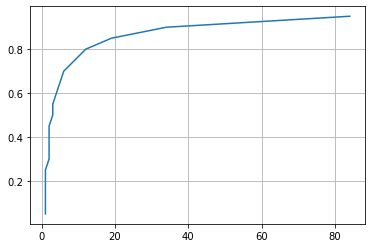

In [5]:
percent = []
components = []

for i in range (5,100, 5):
    pca = PCA(i/100)
    percent.append(i/100)
    components.append(len(pca.fit_transform(X_train)[0]))
    
plt.plot(components, percent)
plt.grid(True)

In [12]:
pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
X_train.shape #Ao manter 95% da qualidade dos dados, foi possível reduzir para 84 colunas

(400, 84)

# Keras

Foi utilizado uma Rede Neural Convolucional, onde não há influencias entre os dados. Caso tenha influência, ele pode dar puxar os dados da foto anterior e classificar sofrendo influência.

## Acurácia

In [21]:
model = Sequential()
model.add(Dense(units = 12, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=84, activation="relu", kernel_initializer="uniform")`

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`



In [22]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=20)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/150
400/400 [==============================] - 0s 531us/step - loss: 0.6925 - accuracy: 0.6150
Epoch 2/150
400/400 [==============================] - 0s 57us/step - loss: 0.6892 - accuracy: 0.7250
Epoch 3/150
400/400 [==============================] - 0s 60us/step - loss: 0.6768 - accuracy: 0.7900
Epoch 4/150
400/400 [==============================] - 0s 57us/step - loss: 0.6340 - accuracy: 0.8025
Epoch 5/150
400/400 [==============================] - 0s 57us/step - loss: 0.5494 - accuracy: 0.8075
Epoch 6/150
400/400 [==============================] - 0s 57us/step - loss: 0.4548 - accuracy: 0.8125
Epoch 7/150
400/400 [==============================] - 0s 57us/step - loss: 0.3902 - accuracy: 0.8250
Epoch 8/150
400/400 [==============================] - 0s 56us/step - loss: 0.3528 - accuracy: 0.8375
Epoch 9/150
400/400 [==============================] - 0s 62us/step - loss: 0.3272 - accuracy: 0.8450
Epoch 10/150
400/400 [==============================] - 0s 67us/step - loss: 0.30

In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Perda: %.2f%%" % (scores[0]*100))
print("Acurácia: %.2f%%" % (scores[1]*100))

Perda: 213.15%
Acurácia: 75.00%


## Precisão

In [29]:
model = Sequential()
model.add(Dense(units = 12, input_dim=84, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.Precision()])

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(units=12, input_dim=84, activation="relu", kernel_initializer="uniform")`

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`



In [30]:
model.fit(X_train, y_train, nb_epoch=150, batch_size=20)

C:\Users\yukar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 1/150
400/400 [==============================] - 1s 2ms/step - loss: 0.6924 - precision: 0.6306
Epoch 2/150
400/400 [==============================] - 0s 67us/step - loss: 0.6883 - precision: 0.7113
Epoch 3/150
400/400 [==============================] - 0s 62us/step - loss: 0.6759 - precision: 0.7332
Epoch 4/150
400/400 [==============================] - 0s 62us/step - loss: 0.6401 - precision: 0.7370
Epoch 5/150
400/400 [==============================] - 0s 62us/step - loss: 0.5692 - precision: 0.7448
Epoch 6/150
400/400 [==============================] - 0s 60us/step - loss: 0.4749 - precision: 0.7499
Epoch 7/150
400/400 [==============================] - 0s 65us/step - loss: 0.4067 - precision: 0.7522
Epoch 8/150
400/400 [==============================] - 0s 57us/step - loss: 0.3652 - precision: 0.7609
Epoch 9/150
400/400 [==============================] - 0s 60us/step - loss: 0.3335 - precision: 0.7643
Epoch 10/150
400/400 [==============================] - 0s 60us/step - los

In [33]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Perda: %.2f%%" % (results[0]*100))
print("Precisão: %.2f%%" % (results[1]*100))

Perda: 200.18%
Precisão: 97.03%
